In [132]:
library(dplyr)
library(ggplot2)
library(ggbeeswarm)
library(ggthemes)
library(cowplot)

In [190]:
df = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/interaction_test/MOFA/10factors_example.csv", row.names=1)
df = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/interaction_test/MOFA/10factors_example_0.csv", row.names=1)
# df = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/interaction_test/MOFA/10factors_example_1.csv", row.names=1)
head(df,2)

,X21_47592990_C_T,ENSG00000160294_MCM3AP
21843_1#10,1,4.559266
21843_1#100,0,3.915595


In [191]:
colnames(df) = gsub("X","",colnames(df))
df$cell = row.names(df)
head(df,2)

,21_47592990_C_T,ENSG00000160294_MCM3AP,cell
21843_1#10,1,4.559266,21843_1#10
21843_1#100,0,3.915595,21843_1#100


In [192]:
# sce = readRDS("/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/merged/20180618/sce_merged_afterqc_filt_allexpts.rds")
sce

class: SingleCellExperiment 
dim: 11231 36044 
metadata(4): log.exprs.offset log.exprs.offset log.exprs.offset
  log.exprs.offset
assays(3): tpm counts logcounts
rownames(11231): ENSG00000000003_TSPAN6 ENSG00000000419_DPM1 ...
  ENSG00000272325_NUDT3 ENSG00000272398_CD24
rowData names(17): exprs_collapsed_to ensembl_transcript_id ...
  is_intop2000hvg is_hvg
colnames(36044): 21843_1#10 21843_1#100 ... 24539_8#97 24539_8#98
colData names(123): adj_x adj_y ... princ_curve princ_curve_scaled01
reducedDimNames(1): PCA
spikeNames(1): ERCC
altExpNames(0):

In [193]:
day_df = data.frame(cell = colnames(sce), day = sce$day)

In [194]:
envs = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/mofa_logcounts_model_factors.csv", row.names =1)
envs$cell = rownames(envs)
head(envs)

,MOFA1,MOFA2,MOFA3,MOFA4,MOFA5,MOFA6,MOFA7,MOFA8,MOFA9,MOFA10,cell
21843_1#10,-0.54978801,1.115838,0.09235695,1.4022501,0.64556476,-0.52028919,-0.3669642,0.09409350,-0.43163546,-0.5554214,21843_1#10
21843_1#100,0.26934134,2.197342,0.70375016,0.9313924,-0.33624749,-0.06679895,1.0913378,-0.33318560,-1.77429464,0.5562927,21843_1#100
21843_1#101,-0.02561868,1.815617,-0.07399272,0.2909299,0.06909543,-0.26201854,0.3368859,-0.09247512,-0.56759889,0.9190941,21843_1#101
21843_1#102,-0.69904249,1.170264,0.17953677,0.5010695,1.54701071,-0.42785988,-0.3828566,-0.29405223,0.04949797,0.1416926,21843_1#102
21843_1#103,-0.22270389,1.551141,-0.15298686,0.2631688,0.79750270,0.21590236,-0.2753360,-0.27335215,-0.20861100,-0.4210160,21843_1#103
21843_1#105,-0.09453730,1.687362,-0.33069673,0.4194430,0.09878901,-1.16140408,-0.2627581,-0.33520853,-1.35048335,-0.8427376,21843_1#105


In [195]:
nrow(df)
nrow(envs)

[1] 35751

[1] 36044

In [196]:
df_e = inner_join(df,envs)
df0 = inner_join(df_e,day_df)
nrow(df0)
head(df0)

Joining, by = "cell"
Joining, by = "cell"
Warning message:
“Column `cell` joining character vector and factor, coercing into character vector”

[1] 35751

21_47592990_C_T,ENSG00000160294_MCM3AP,cell,MOFA1,MOFA2,MOFA3,MOFA4,MOFA5,MOFA6,MOFA7,MOFA8,MOFA9,MOFA10,day
1,4.559266,21843_1#10,-0.54978801,1.115838,0.09235695,1.4022501,0.64556476,-0.52028919,-0.3669642,0.09409350,-0.43163546,-0.5554214,day1
0,3.915595,21843_1#100,0.26934134,2.197342,0.70375016,0.9313924,-0.33624749,-0.06679895,1.0913378,-0.33318560,-1.77429464,0.5562927,day1
0,4.117372,21843_1#101,-0.02561868,1.815617,-0.07399272,0.2909299,0.06909543,-0.26201854,0.3368859,-0.09247512,-0.56759889,0.9190941,day1
0,3.827734,21843_1#102,-0.69904249,1.170264,0.17953677,0.5010695,1.54701071,-0.42785988,-0.3828566,-0.29405223,0.04949797,0.1416926,day1
1,3.751451,21843_1#103,-0.22270389,1.551141,-0.15298686,0.2631688,0.79750270,0.21590236,-0.2753360,-0.27335215,-0.20861100,-0.4210160,day1
0,3.567483,21843_1#105,-0.09453730,1.687362,-0.33069673,0.4194430,0.09878901,-1.16140408,-0.2627581,-0.33520853,-1.35048335,-0.8427376,day1


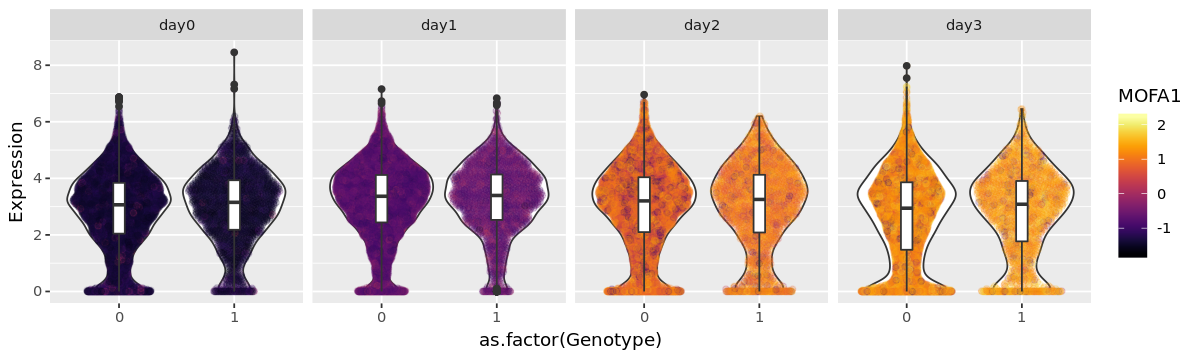

In [197]:
colnames(df0)[c(1,2)] = c("Genotype","Expression")
options(repr.plot.width = 10, repr.plot.height = 3)
ggplot(df0, aes(x=as.factor(Genotype), y = Expression, colour = MOFA1)) + geom_violin() + 
        geom_quasirandom(alpha = 0.2) + geom_boxplot(width=0.1) + scale_color_viridis(option = "B") + facet_wrap(~day, ncol = 4)

In [198]:
options(repr.plot.width = 8, repr.plot.height = 5)
df0$Genotype = as.factor(df0$Genotype)
plist = c()
for (i in 1:10){
    xlab = colnames(df0)[i+3]
#     print(xlab)
    p = ggplot(df0, aes_string(x=xlab, y = 'Expression', colour = 'Genotype')) + geom_point(alpha = 0.1) 
    p = p + stat_smooth() + scale_color_canva(palette = "Primary colors with a vibrant twist")
    plist[[i]] = p
}

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


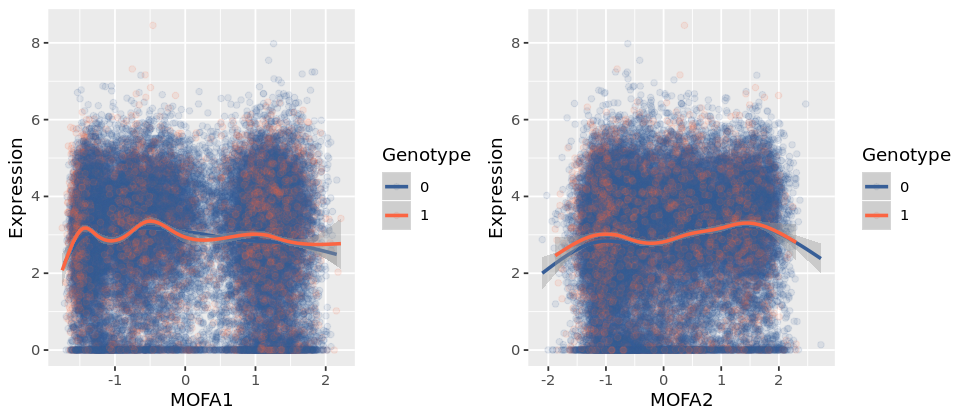

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


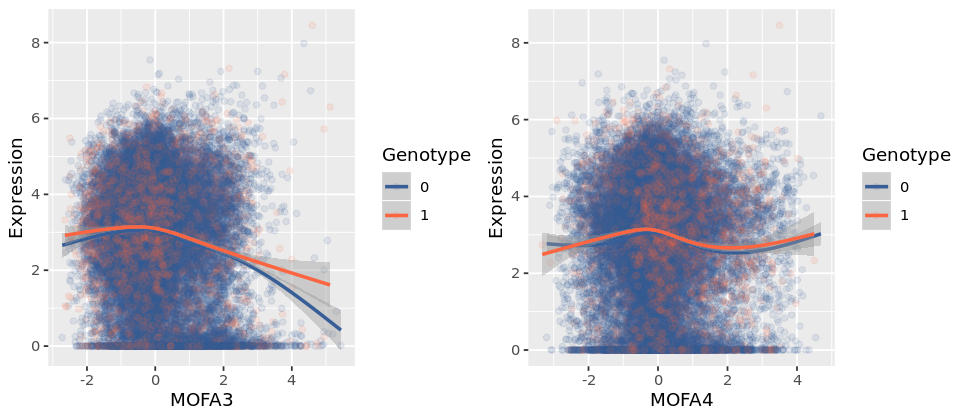

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


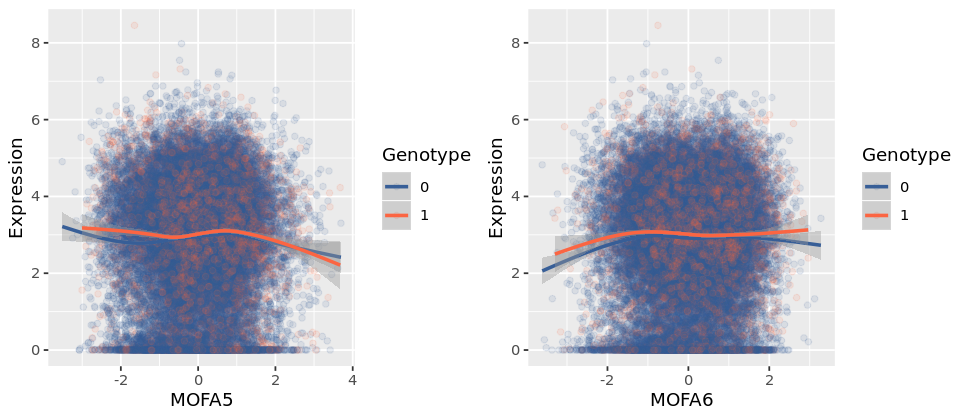

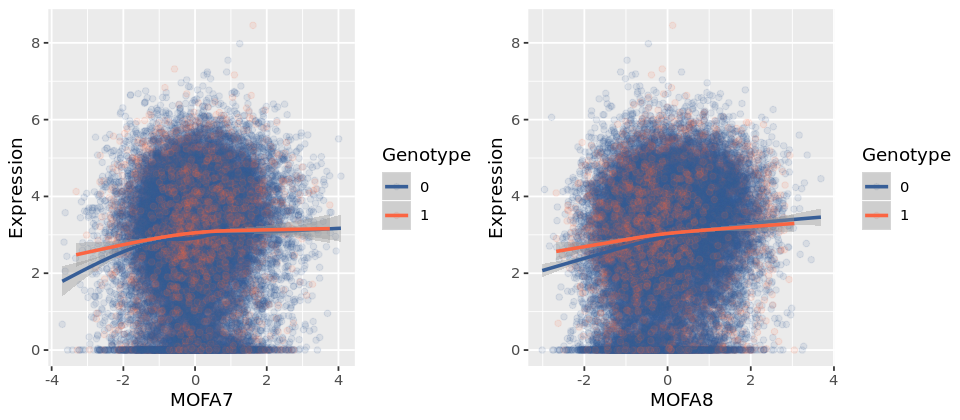

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 3.5)
for (i in 1:5){
    p1 = plist[[(i)*2-1]]
    p2 = plist[[i*2]]
    print(plot_grid(p1, p2, ncol = 2))
}

In [66]:
df0_day0 = df0[df0$cell %in% colnames(sce[,sce$day == "day0"]),]
df0_day1 = df0[df0$cell %in% colnames(sce[,sce$day == "day1"]),]
df0_day2 = df0[df0$cell %in% colnames(sce[,sce$day == "day2"]),]
df0_day3 = df0[df0$cell %in% colnames(sce[,sce$day == "day3"]),]

In [82]:
library(circlize)

circlize version 0.4.9
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))



In [83]:
options(repr.plot.width = 5, repr.plot.height = 5)
# ggplot(df0_day0, aes(x=as.factor(Genotype), y = Expression, colour = MOFA1)) + geom_violin() + 
#         geom_quasirandom(alpha = 0.2) + geom_boxplot(width=0.08) + scale_color_gradient2(midpoint = mid, low = "blue", mid = "white",
#                             high = "red", space = "Lab" )
# ggplot(df0_day1, aes(x=as.factor(Genotype), y = Expression, colour = MOFA1)) + geom_violin() + 
#         geom_quasirandom(alpha = 0.2) + geom_boxplot(width=0.08) + scale_color_gradient2(midpoint = mid, low = "blue", mid = "white",
#                             high = "red", space = "Lab" )
# ggplot(df0_day2, aes(x=as.factor(Genotype), y = Expression, colour = MOFA1)) + geom_violin() + 
#         geom_quasirandom(alpha = 0.2) + geom_boxplot(width=0.08) + scale_color_gradient2(midpoint = mid, low = "blue", mid = "white",
#                             high = "red", space = "Lab" )
ggplot(df0_day3, aes(x=as.factor(Genotype), y = Expression, colour = MOFA1)) + geom_violin() + 
        geom_quasirandom(alpha = 0.2) + geom_boxplot(width=0.08) + colorRamp2(c(-1, 0,1), c("blue", "lightgrey","firebrick"))

ERROR: Error: Don't know how to add colorRamp2(c(-1, 0, 1), c("blue", "lightgrey", "firebrick")) to a plot


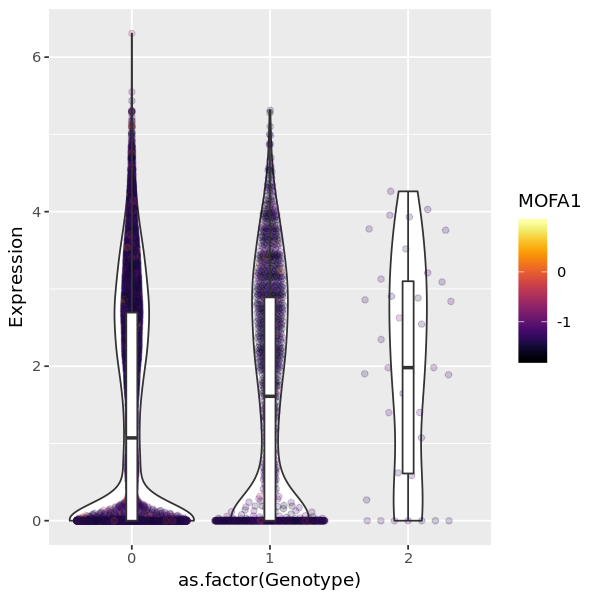

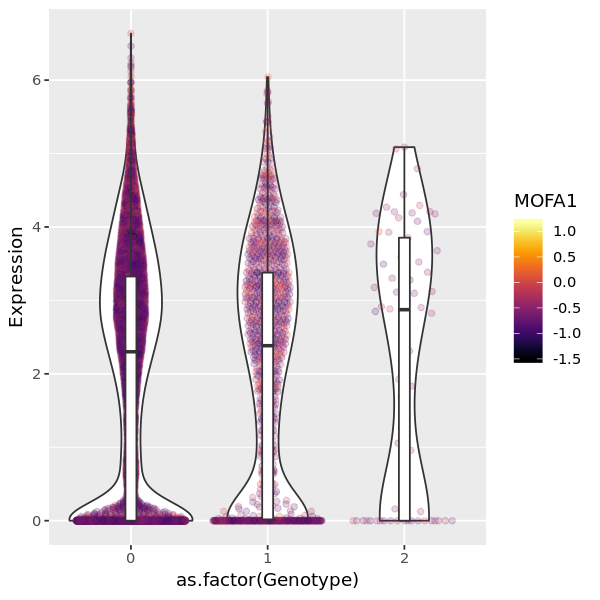

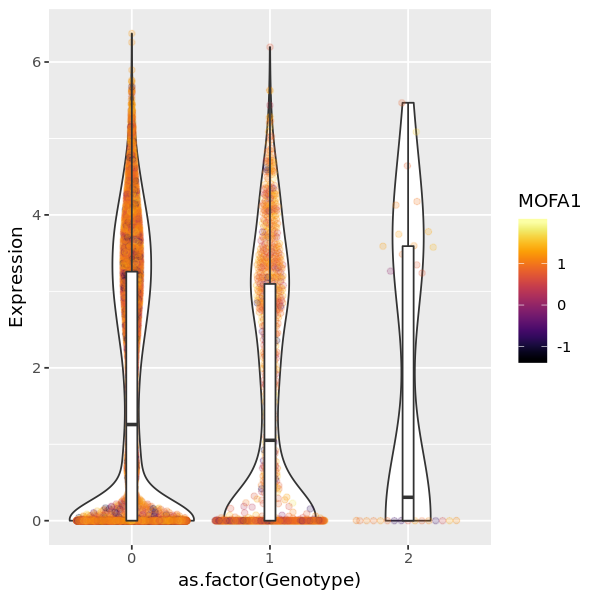

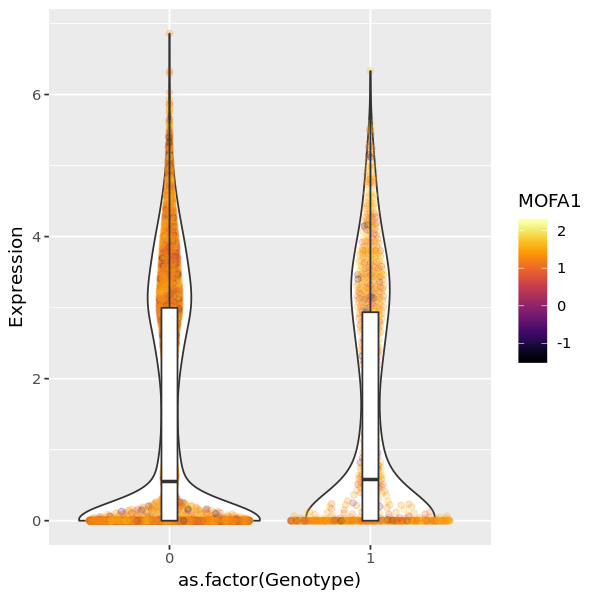

In [77]:
options(repr.plot.width = 5, repr.plot.height = 5)
ggplot(df0_day0, aes(x=as.factor(Genotype), y = Expression, colour = MOFA1)) + geom_violin() + 
        geom_quasirandom(alpha = 0.2) + geom_boxplot(width=0.08) + scale_color_viridis(option = "B")
ggplot(df0_day1, aes(x=as.factor(Genotype), y = Expression, colour = MOFA1)) + geom_violin() + 
        geom_quasirandom(alpha = 0.2) + geom_boxplot(width=0.08) + scale_color_viridis(option = "B")
ggplot(df0_day2, aes(x=as.factor(Genotype), y = Expression, colour = MOFA1)) + geom_violin() + 
        geom_quasirandom(alpha = 0.2) + geom_boxplot(width=0.08) + scale_color_viridis(option = "B")
ggplot(df0_day3, aes(x=as.factor(Genotype), y = Expression, colour = MOFA1)) + geom_violin() + 
        geom_quasirandom(alpha = 0.2) + geom_boxplot(width=0.08) + scale_color_viridis(option = "B")